In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('house_data_ultimate_cleaned', index_col='Unnamed: 0')

In [3]:
df.head()

,Area,Price,State_of_building,Facades,Bedrooms,Kitchen,Furnished,Open_fire,Zip_code,Land_surface,Terrace,Terrace_surface,Swimming_pool,Subtype_property,Garden,Garden_surface,Regions,Price_per_square_meter
0,123.0,200000,Good,3.0,2.0,Installed,No,No,3294,429.0,No,0,No,house,Yes,350,Flanders,1626.02
1,255.0,698000,Just renovated,4.0,4.0,Installed,No,No,2070,1210.0,No,0,No,villa,No,0,Flanders,2737.25
2,234.0,499000,As new,NaN,5.0,NaN,No,No,8800,744.0,No,0,No,villa,No,0,Flanders,2132.48
3,219.0,717000,As new,NaN,4.0,NaN,No,No,8000,760.0,No,0,No,house,No,0,Flanders,3273.97
4,156.0,429000,Good,4.0,4.0,Installed,No,No,8800,419.0,No,0,No,villa,Yes,90,Flanders,2750.00


In [4]:
df.Regions.value_counts()

Flanders    4293
Wallonia    2986
Brussels     522
Name: Regions, dtype: int64

In [5]:
def area_category(x):
    if x <= 140:
        return 'Small'
    elif x <= 180:
        return 'Medium -'
    elif x <= 253:
        return 'Medium +'
    else:
        return 'Large'

In [6]:
df['Area_category'] = df['Area'].apply(lambda x: area_category(x))

In [7]:
df['Area_category'].value_counts()

Medium -    2031
Small       1966
Large       1942
Medium +    1862
Name: Area_category, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 8332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    7801 non-null   float64
 1   Price                   7801 non-null   int64  
 2   State_of_building       5889 non-null   object 
 3   Facades                 6256 non-null   float64
 4   Bedrooms                7746 non-null   float64
 5   Kitchen                 5601 non-null   object 
 6   Furnished               7801 non-null   object 
 7   Open_fire               7801 non-null   object 
 8   Zip_code                7801 non-null   int64  
 9   Land_surface            7801 non-null   float64
 10  Terrace                 7801 non-null   object 
 11  Terrace_surface         7801 non-null   int64  
 12  Swimming_pool           7801 non-null   object 
 13  Subtype_property        7801 non-null   object 
 14  Garden                  7801 non-null   

In [9]:
df.shape

(7801, 19)

In [10]:
print('Some statistics of the house price:')
print(df['Price'].describe())
print()
print('House price median')
print(df['Price'].median())

Some statistics of the house price:
count    7.801000e+03
mean     4.712033e+05
std      4.385355e+05
min      2.500000e+03
25%      2.490000e+05
50%      3.390000e+05
75%      4.990000e+05
max      3.000000e+06
Name: Price, dtype: float64

House price median
339000.0


In [11]:
corr=df.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price                     1.000000
Price_per_square_meter    0.638335
Area                      0.513989
Bedrooms                  0.441721
Facades                   0.263788
Land_surface              0.135736
Garden_surface            0.055409
Terrace_surface           0.018380
Zip_code                 -0.272808
Name: Price, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


(0.0, 1000000.0)

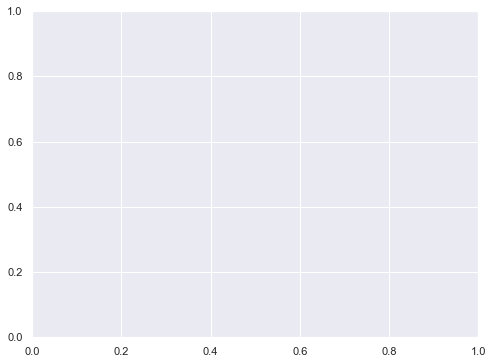

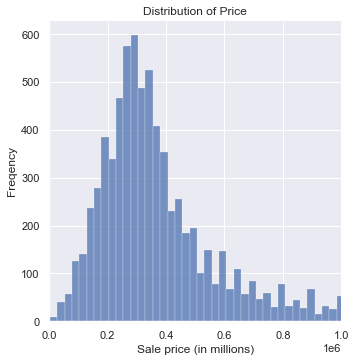

In [12]:
fig,ax = plt.subplots(figsize=(8,6))
d = sns.displot(data=df, x="Price",ax=ax, multiple="stack")
plt.title('Distribution of Price')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 1000000)

<AxesSubplot:xlabel='Price', ylabel='Density'>

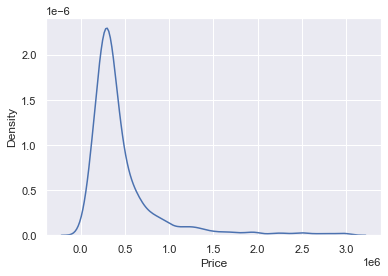

In [13]:
sns.kdeplot(df['Price'])

Text(0.5, 1.0, 'Numeric Variable Heatmap')

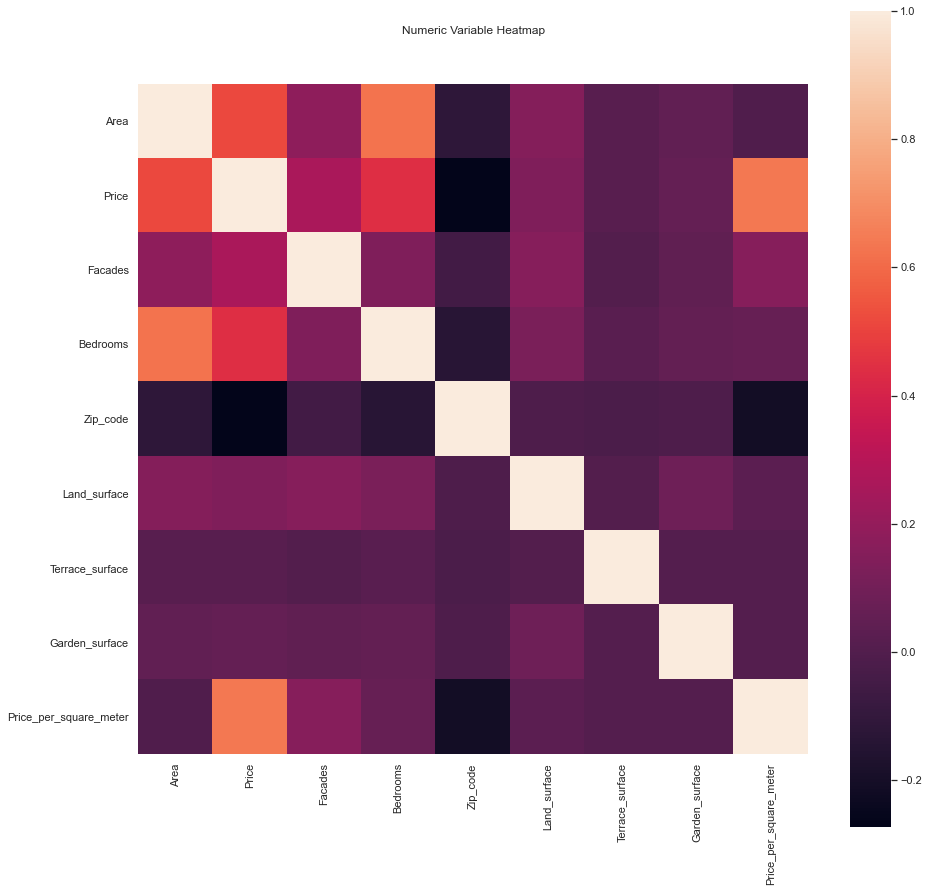

In [14]:
fig,ax = plt.subplots(figsize=(15,15))
correlation = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True, cmap="rocket")
sns.set_context(font_scale = 2)
ax.set_title('Numeric Variable Heatmap', pad=50)

(0.0, 1500000.0)

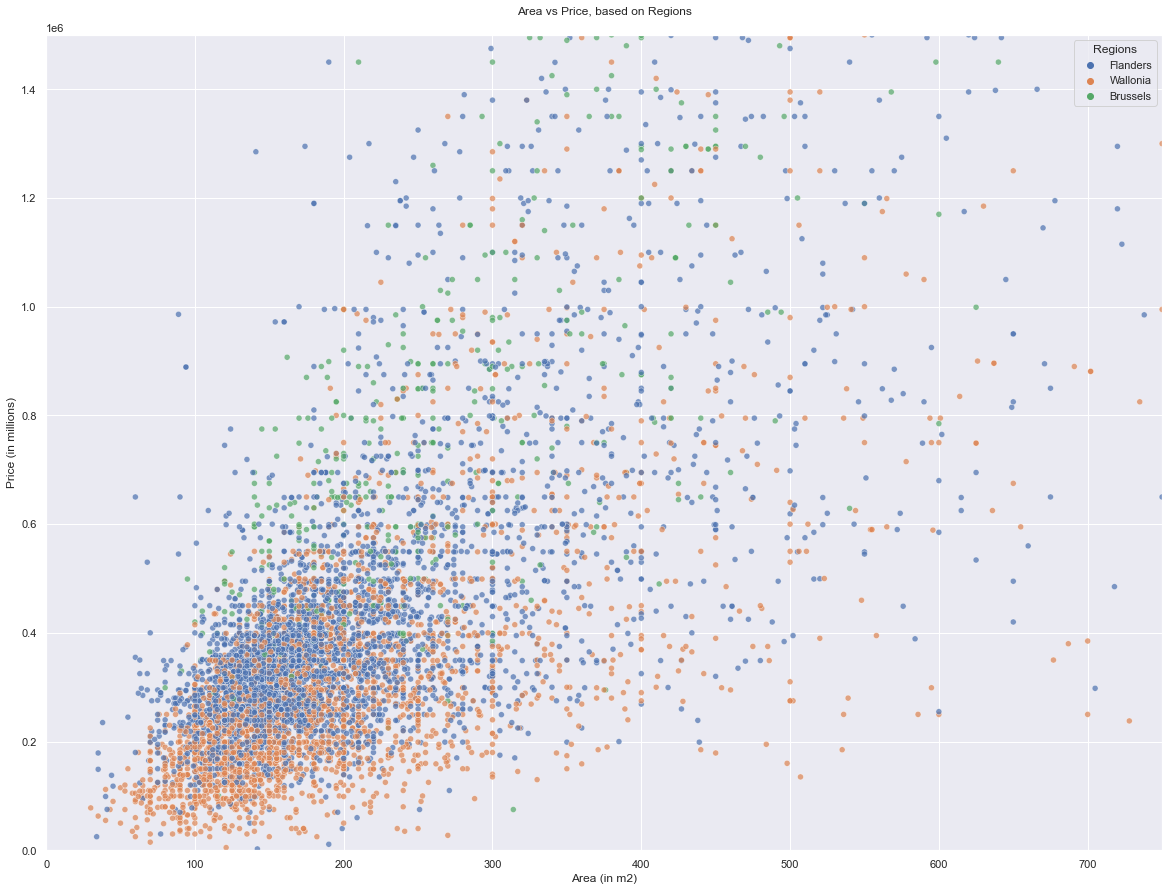

In [15]:
fig,ax = plt.subplots(figsize=(20,15))
sns.scatterplot(data=df, x="Area", y="Price", hue='Regions', ax=ax, alpha=.7)
ax.set_title('Area vs Price, based on Regions', pad=20)
plt.ylabel('Price (in millions)')
plt.xlabel('Area (in m2)')
plt.xlim(0, 750)
plt.ylim(0, 1500000)

(0.0, 1500000.0)

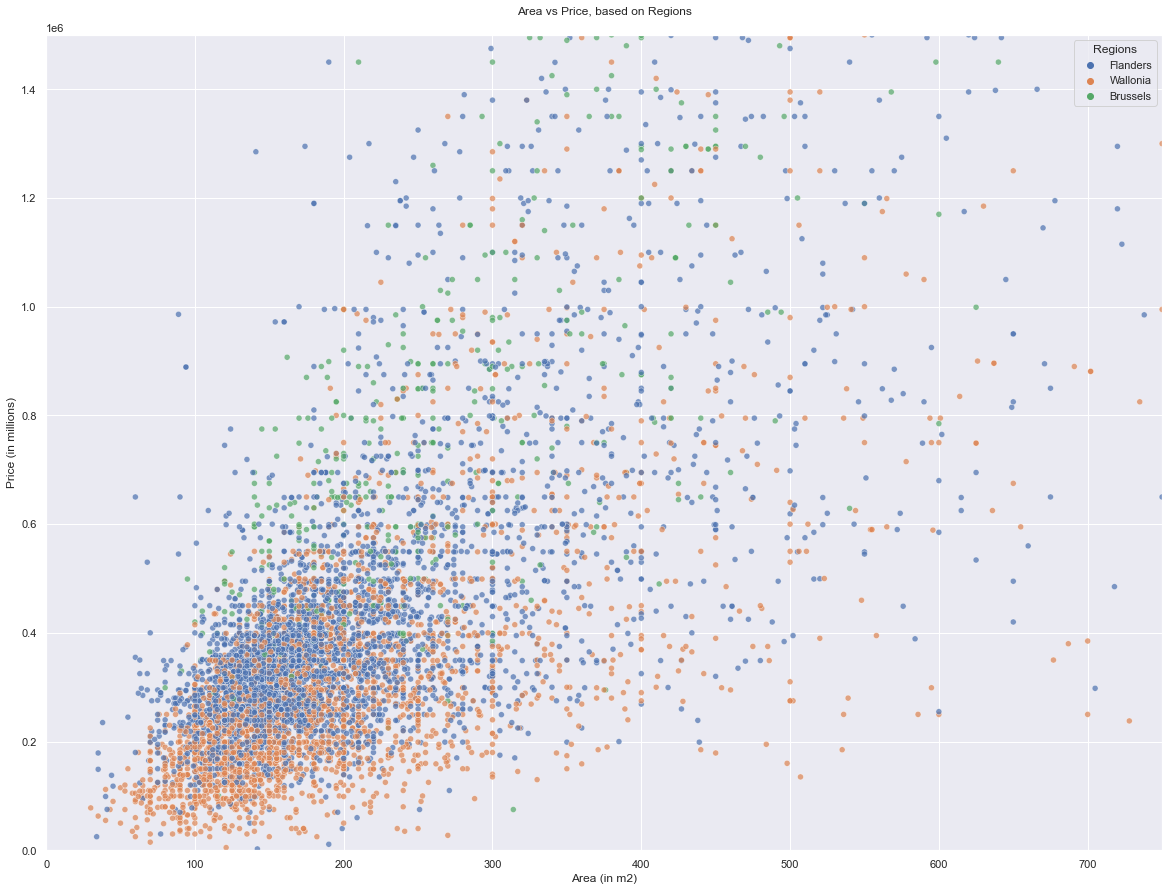

In [16]:
fig,ax = plt.subplots(figsize=(20,15))
sns.scatterplot(data=df, x="Area", y="Price", hue='Regions', ax=ax, alpha=.7)
sns.set_context(font_scale = 2)
ax.set_title('Area vs Price, based on Regions', pad=20)
plt.ylabel('Price (in millions)')
plt.xlabel('Area (in m2)')
plt.xlim(0, 750)
plt.ylim(0, 1500000)

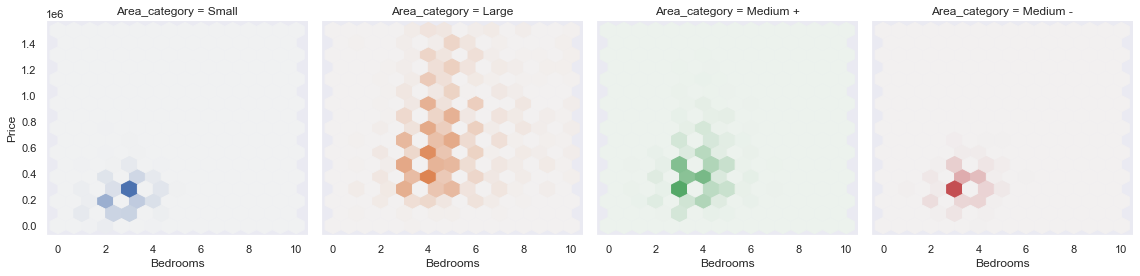

In [17]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue="Area_category", col="Area_category", height=4)
g.map(hexbin, "Bedrooms", "Price", extent=[0, 10, 0, 1500000]);

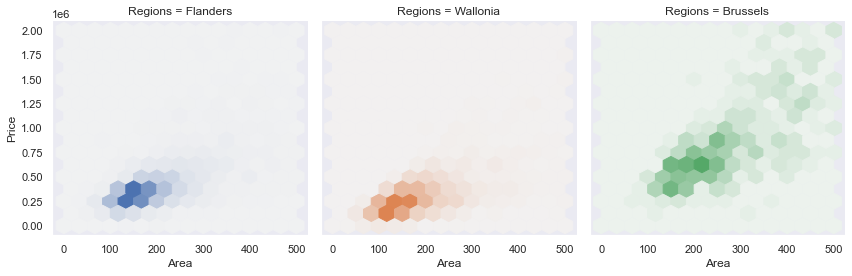

In [18]:
with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue= 'Regions', col="Regions", height=4)
g.map(hexbin, "Area", "Price", extent=[0, 500, 0, 2000000]);

Text(875.224375, 0.5, 'Freqency')

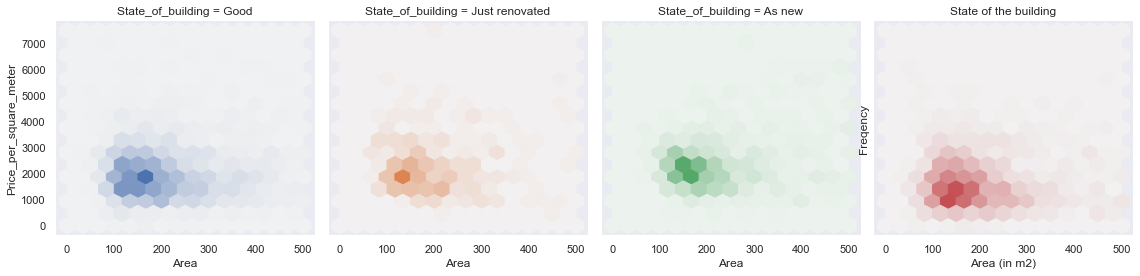

In [19]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(df, hue= 'State_of_building', col='State_of_building', height=4)
g.map(hexbin, "Area", "Price_per_square_meter", extent=[0, 500, 0, 7500]);
plt.title('State of the building')
plt.xlabel('Area (in m2)')
plt.ylabel('Freqency')

(0.0, 5000.0)

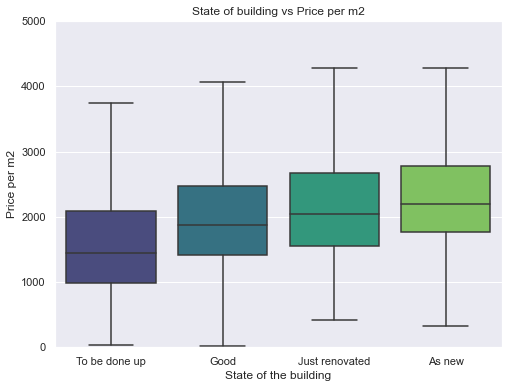

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'State_of_building', y = 'Price_per_square_meter',  data = df,ax=ax, order=["To be done up", "Good", "Just renovated", "As new"], palette= "viridis", showfliers = False)
plt.title('State of building vs Price per m2')
plt.xlabel('State of the building')
plt.ylabel('Price per m2')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.ylim(0, 5000)

(0.0, 7000.0)

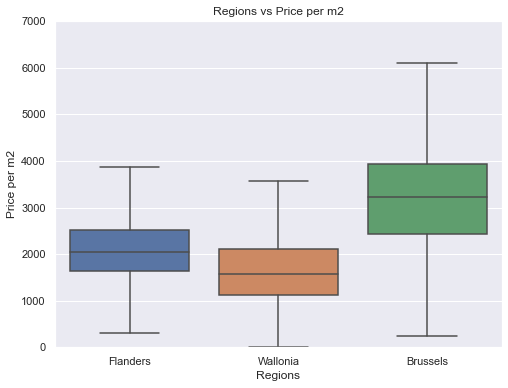

In [21]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price_per_square_meter',  data = df,ax=ax, showfliers = False)
plt.title('Regions vs Price per m2')
plt.xlabel('Regions')
plt.ylabel('Price per m2')
plt.ylim(0, 7000)

Text(0, 0.5, 'Price (in millions)')

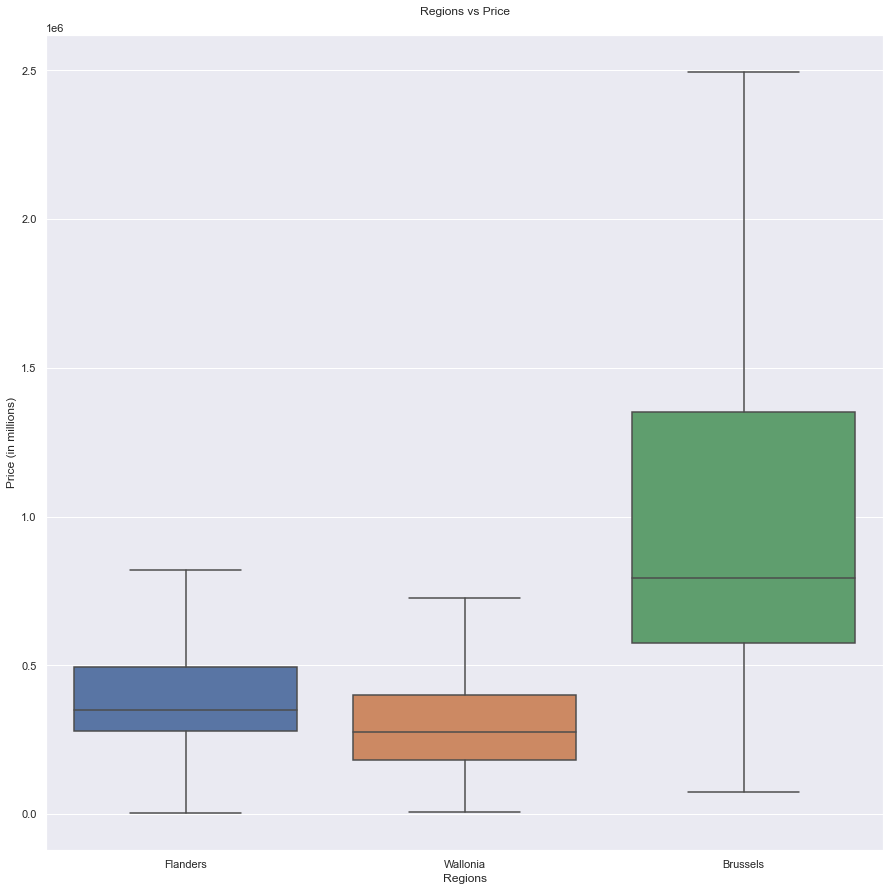

In [22]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Regions', y = 'Price',  data = df,ax=ax, showfliers = False)
#plt.title('Regions vs Price')
ax.set_title('Regions vs Price', pad=20)
plt.xlabel('Regions')
plt.ylabel('Price (in millions)')
#sns.set_context("poster")
#plt.ylim(0, 2000000)

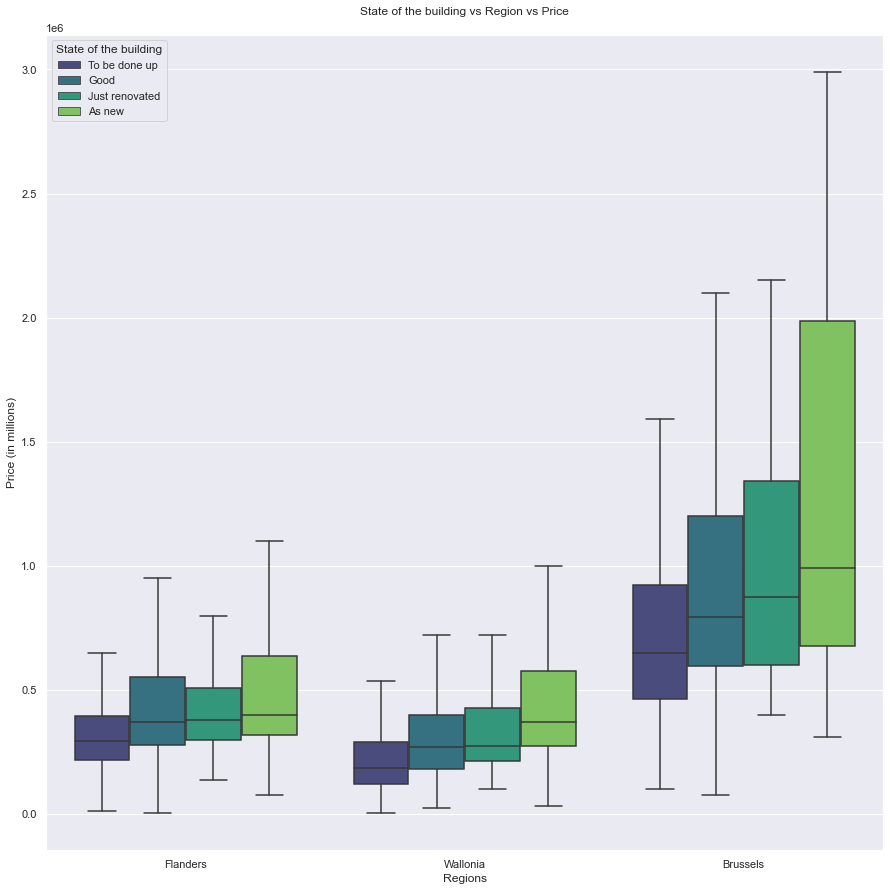

In [23]:
fig,ax = plt.subplots(figsize=(15,15))
hue_order=["To be done up", "Good", "Just renovated", "As new"]
sns.boxplot(x = 'Regions', y = 'Price',  data = df,ax=ax, hue='State_of_building', hue_order=hue_order, palette= "viridis",showfliers = False)
ax.set_title('State of the building vs Region vs Price', pad=20)
plt.xlabel('Regions')
plt.ylabel('Price (in millions)')
plt.legend(title="State of the building")

Text(0, 0.5, 'Price (in millions)')

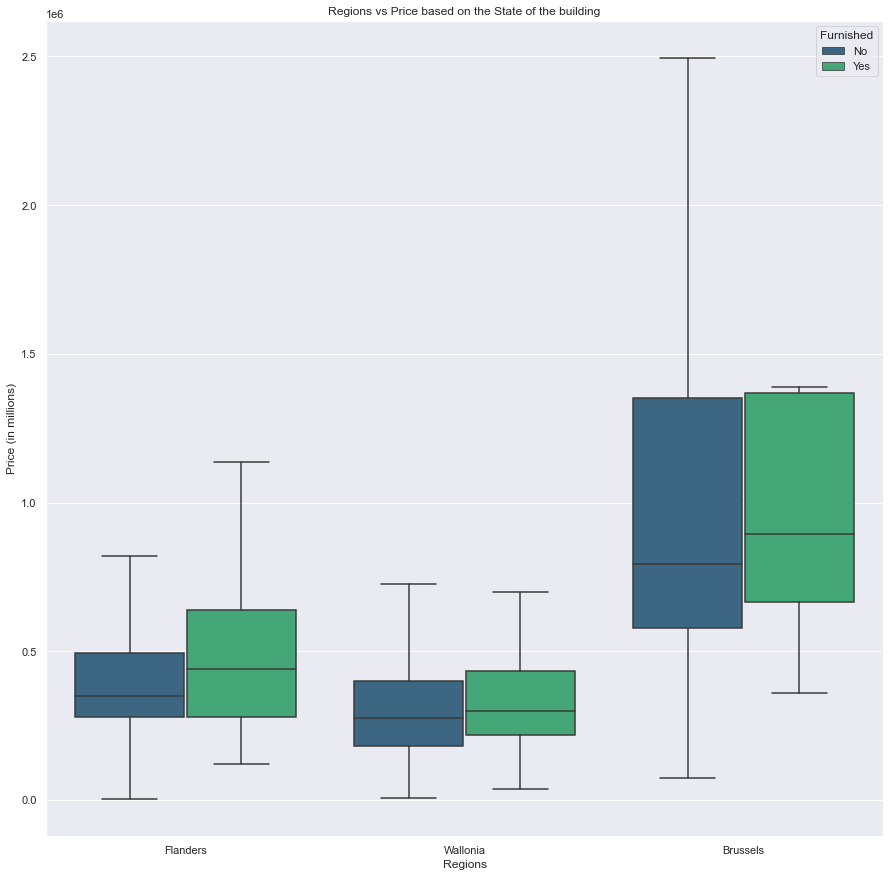

In [24]:
fig,ax = plt.subplots(figsize=(15,15))
#hue_order=["Not installed", "Installed", "Semi equipped", "Hyper equipped"]
sns.boxplot(x = 'Regions', y = 'Price',  data = df,ax=ax, hue='Furnished', palette= "viridis",showfliers = False)
plt.title('Regions vs Price based on the State of the building')
plt.xlabel('Regions')
plt.ylabel('Price (in millions)')
#plt.ylim(0, 3000000)

Text(0, 0.5, 'Area (in m2)')

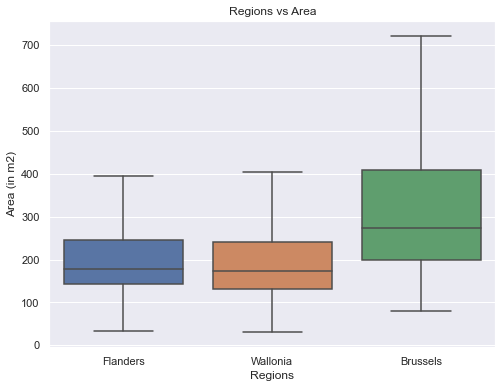

In [25]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Area',  data = df,ax=ax,showfliers = False)
plt.title('Regions vs Area')
plt.xlabel('Regions')
plt.ylabel('Area (in m2)')
#plt.ylim(0, 2800000)

Text(0.5, 1.0, 'Garden vs Price')

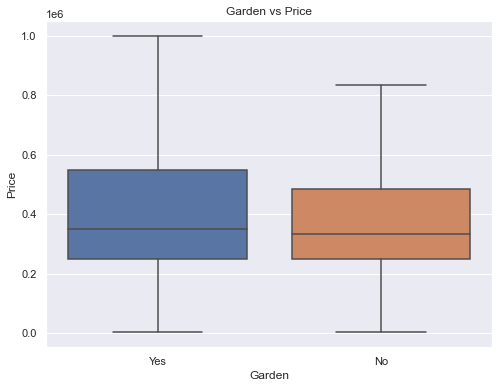

In [26]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Garden', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Garden vs Price')

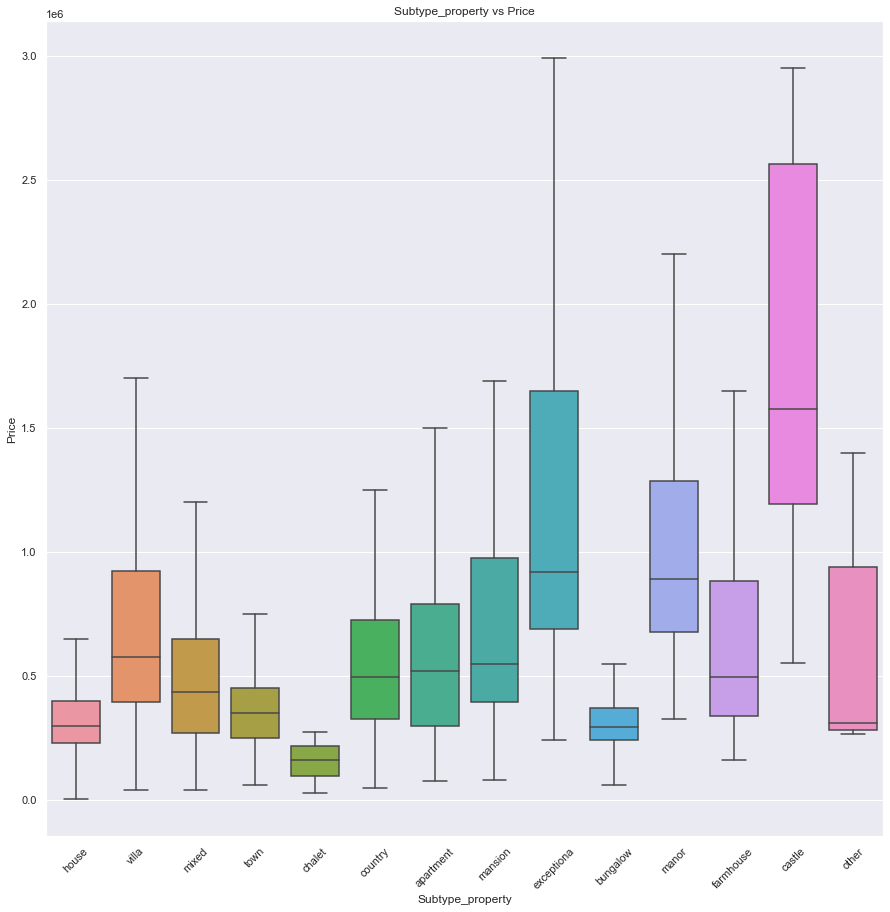

In [27]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Subtype_property', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Subtype_property vs Price')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

Text(0.5, 1.0, 'Is having an open-fire linked to a higher price?')

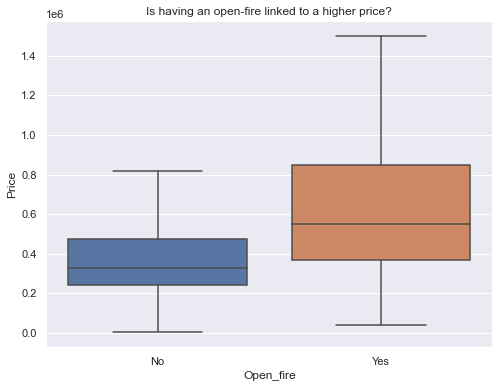

In [28]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Open_fire', y = 'Price', data = df,ax=ax, showfliers = False)
plt.title('Is having an open-fire linked to a higher price?')

Text(0.5, 1.0, 'Is having an open-fire linked to a higher price, based on the area?')

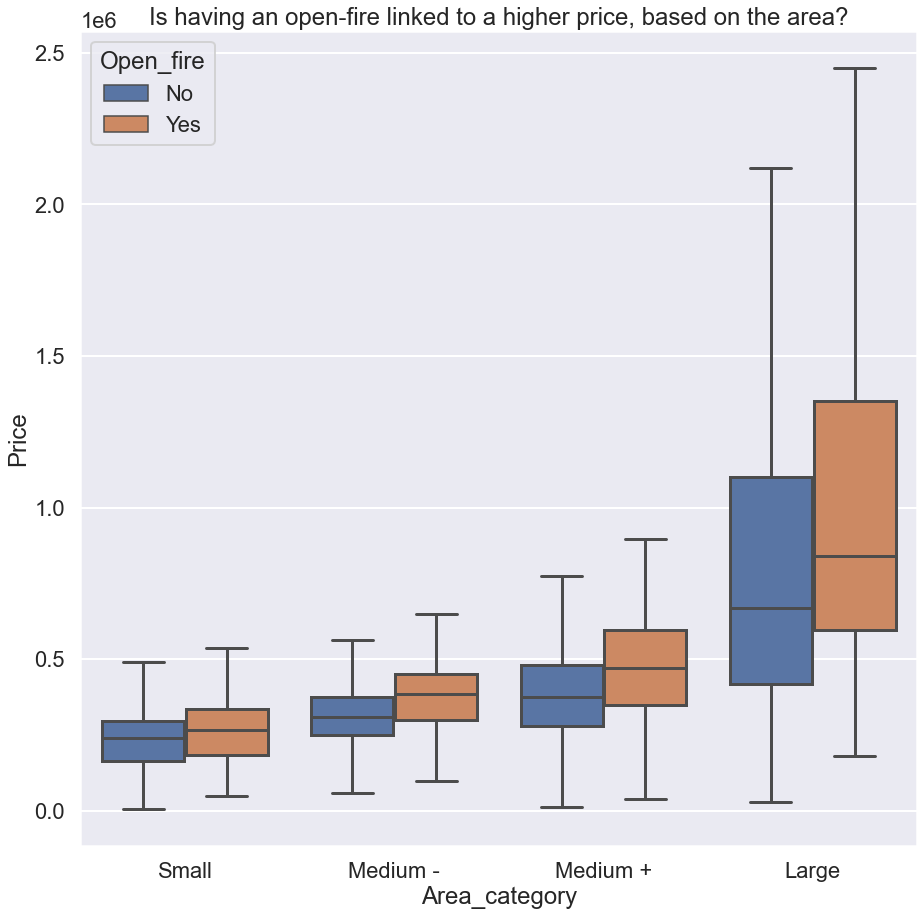

In [47]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Area_category', y = 'Price',  hue='Open_fire', order=['Small','Medium -', 'Medium +', 'Large'], data = df,ax=ax, showfliers = False)
plt.title('Is having an open-fire linked to a higher price, based on the area?')

Text(0.5, 1.0, 'Is having a swimming-pool linked to a higher price?')

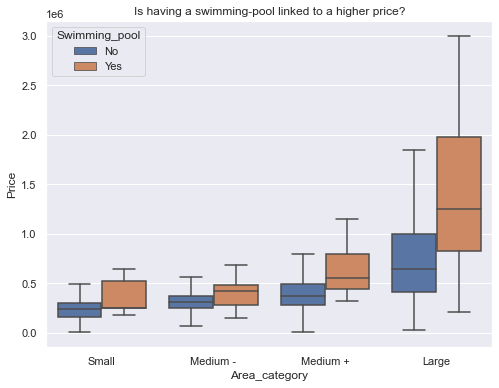

In [30]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Area_category', y = 'Price',  hue='Swimming_pool', order=['Small','Medium -', 'Medium +', 'Large'], data = df,ax=ax, showfliers = False)
plt.title('Is having a swimming-pool linked to a higher price?')

Text(0.5, 1.0, 'Is having a swimming-pool linked to a higher price?')

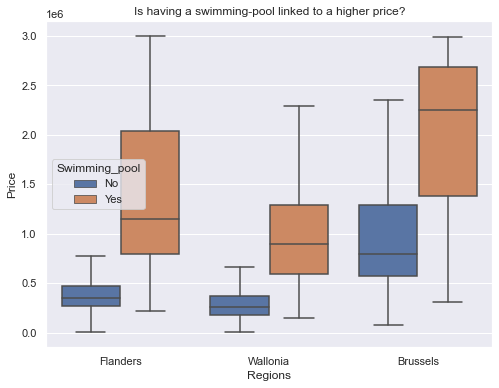

In [31]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Regions', y = 'Price',  hue='Swimming_pool', data = df,ax=ax, showfliers = False)
plt.title('Is having a swimming-pool linked to a higher price?')

Text(0.5, 1.0, 'Is having a swimming pool linked to a bigger area?')

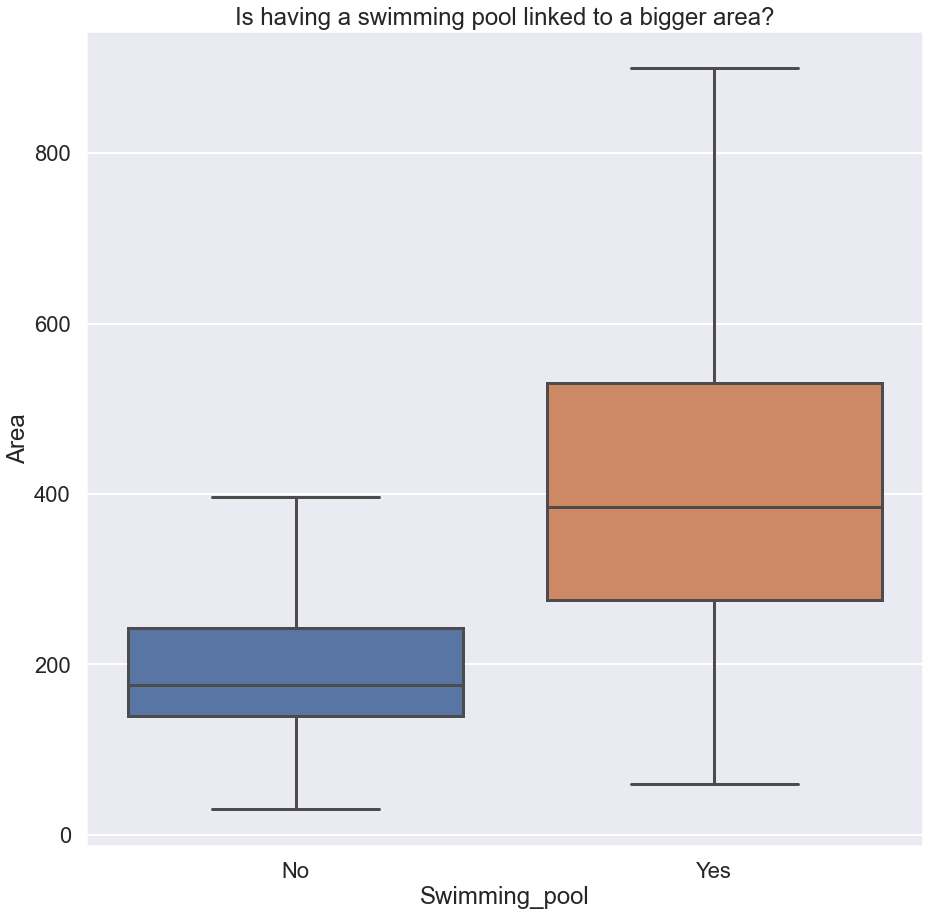

In [43]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Swimming_pool', y = 'Area',  data = df,ax=ax, showfliers = False)
plt.title('Is having a swimming pool linked to a bigger area?')

Text(0.5, 1.0, 'Is fursnihed linked to a higher price?')

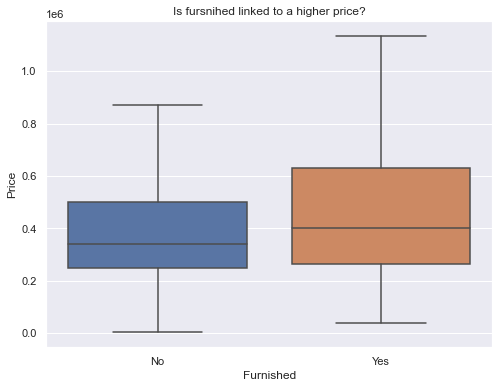

In [33]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'Furnished', y = 'Price',  data = df,ax=ax, showfliers = False)
plt.title('Is fursnihed linked to a higher price?')

Text(0, 0.5, 'Area (in m2)')

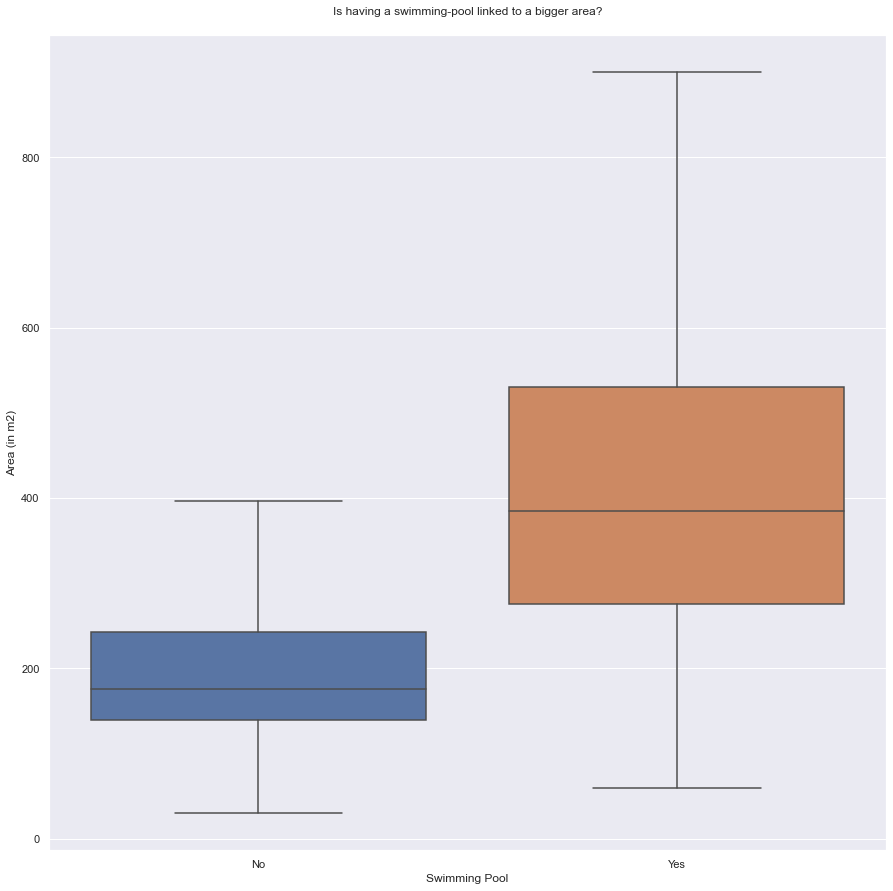

In [34]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Swimming_pool', y = 'Area',  data = df,ax=ax, showfliers = False)
ax.set_title('Is having a swimming-pool linked to a bigger area?', pad=20)
plt.xlabel('Swimming Pool')
plt.ylabel('Area (in m2)')

Text(0.5, 1.0, 'Is kitchen type linked to a higher price?')

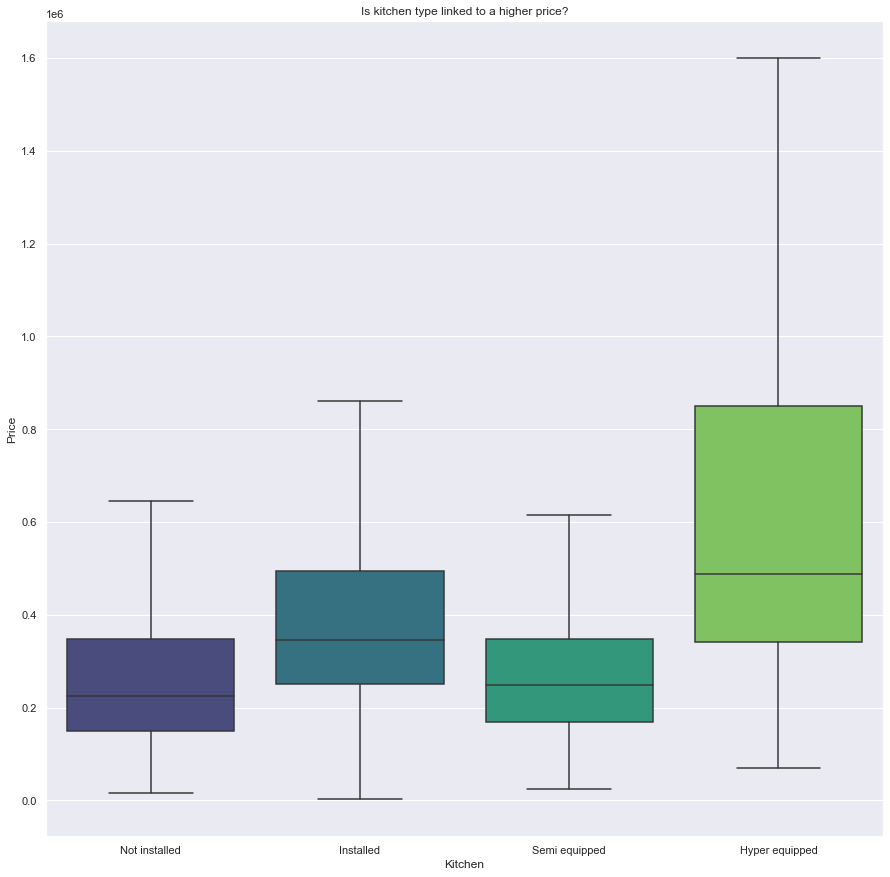

In [35]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Kitchen', y = 'Price',  data = df,ax=ax, order=["Not installed", "Installed", "Semi equipped", "Hyper equipped"], palette= "viridis", showfliers = False)
plt.title('Is kitchen type linked to a higher price?')
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)

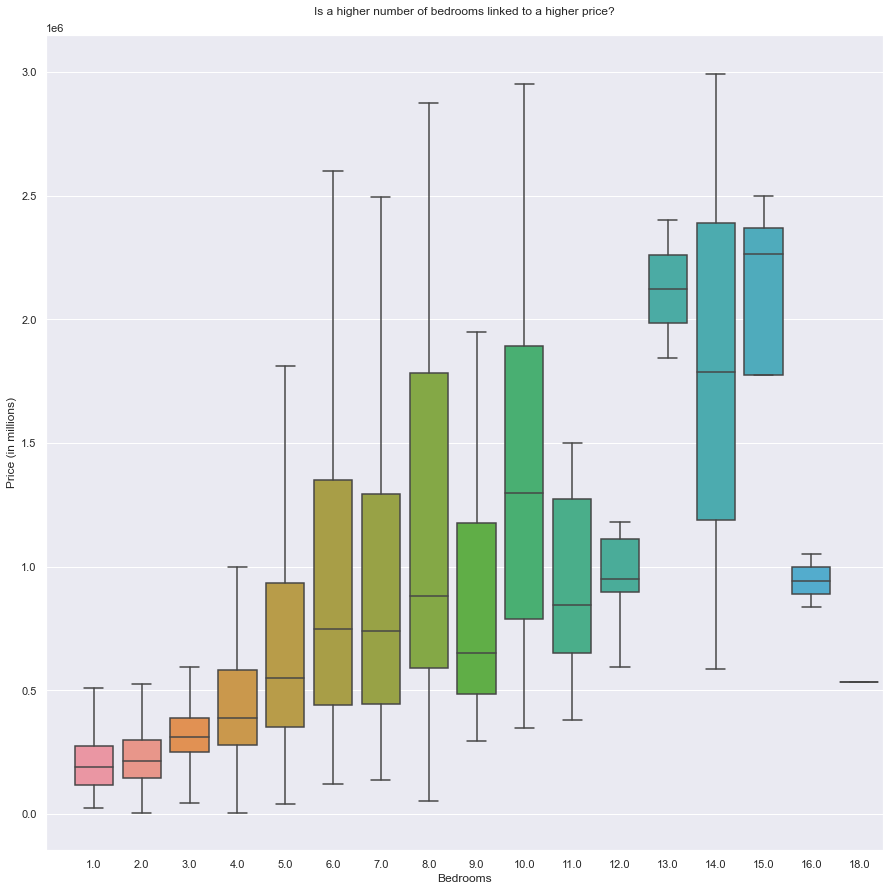

In [36]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Bedrooms', y = 'Price',  data = df,ax=ax, showfliers = False)
ax.set_title('Is a higher number of bedrooms linked to a higher price?', pad=20)
plt.xlim(-1, 16.5)
plt.xlabel('Bedrooms')
plt.ylabel('Price (in millions)')
sns.set(font_scale=2)

(-1.0, 16.5)

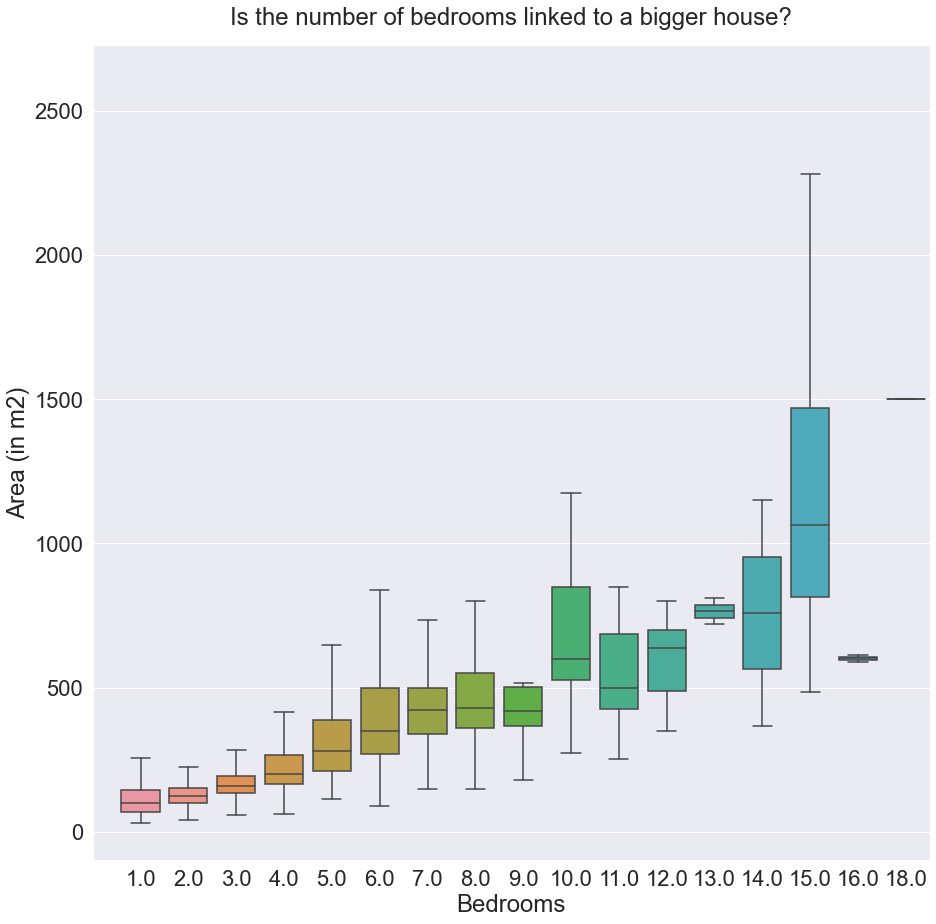

In [37]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'Bedrooms', y = 'Area',  data = df,ax=ax, showfliers = False)
ax.set_title('Is the number of bedrooms linked to a bigger house?', pad=20)
plt.xlabel('Bedrooms')
plt.ylabel('Area (in m2)')
plt.xlim(-1, 16.5)

Text(0, 0.5, 'Area (in m2)')

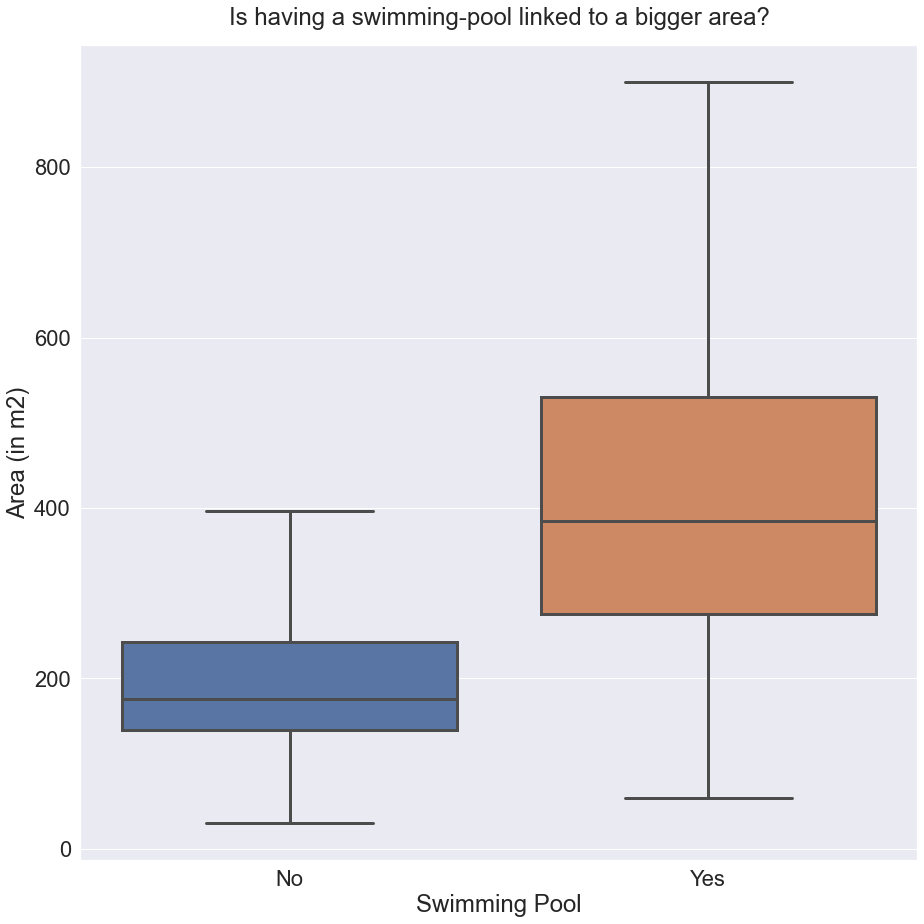

In [38]:
fig,ax = plt.subplots(figsize=(15,15))
sns.set_context("poster")
sns.boxplot(x = 'Swimming_pool', y = 'Area',  data = df,ax=ax, showfliers = False)
ax.set_title('Is having a swimming-pool linked to a bigger area?', pad=20)
plt.xlabel('Swimming Pool')
plt.ylabel('Area (in m2)')

Text(0, 0.5, 'Area (in m2)')

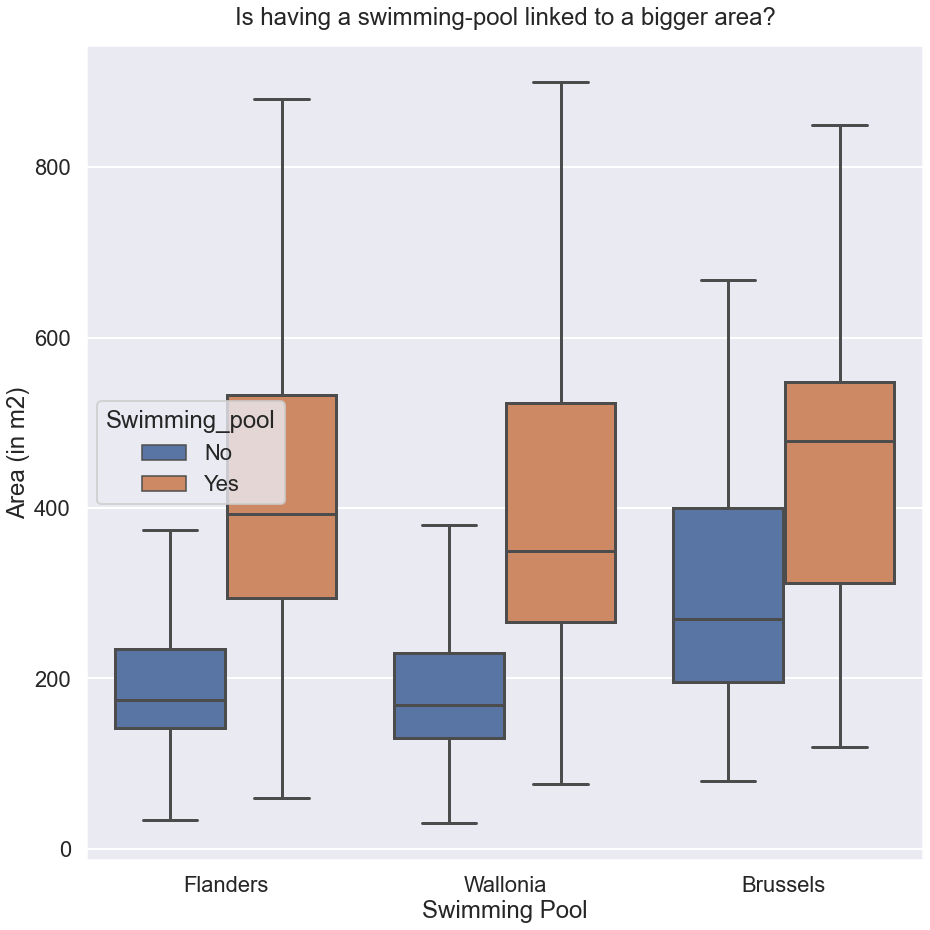

In [39]:
fig,ax = plt.subplots(figsize=(15,15))
sns.set_context("poster")
sns.boxplot(x = 'Regions', y = 'Area', hue='Swimming_pool', data = df,ax=ax, showfliers = False)
ax.set_title('Is having a swimming-pool linked to a bigger area?', pad=20)
plt.xlabel('Swimming Pool')
plt.ylabel('Area (in m2)')

<AxesSubplot:xlabel='Garden', ylabel='Price'>

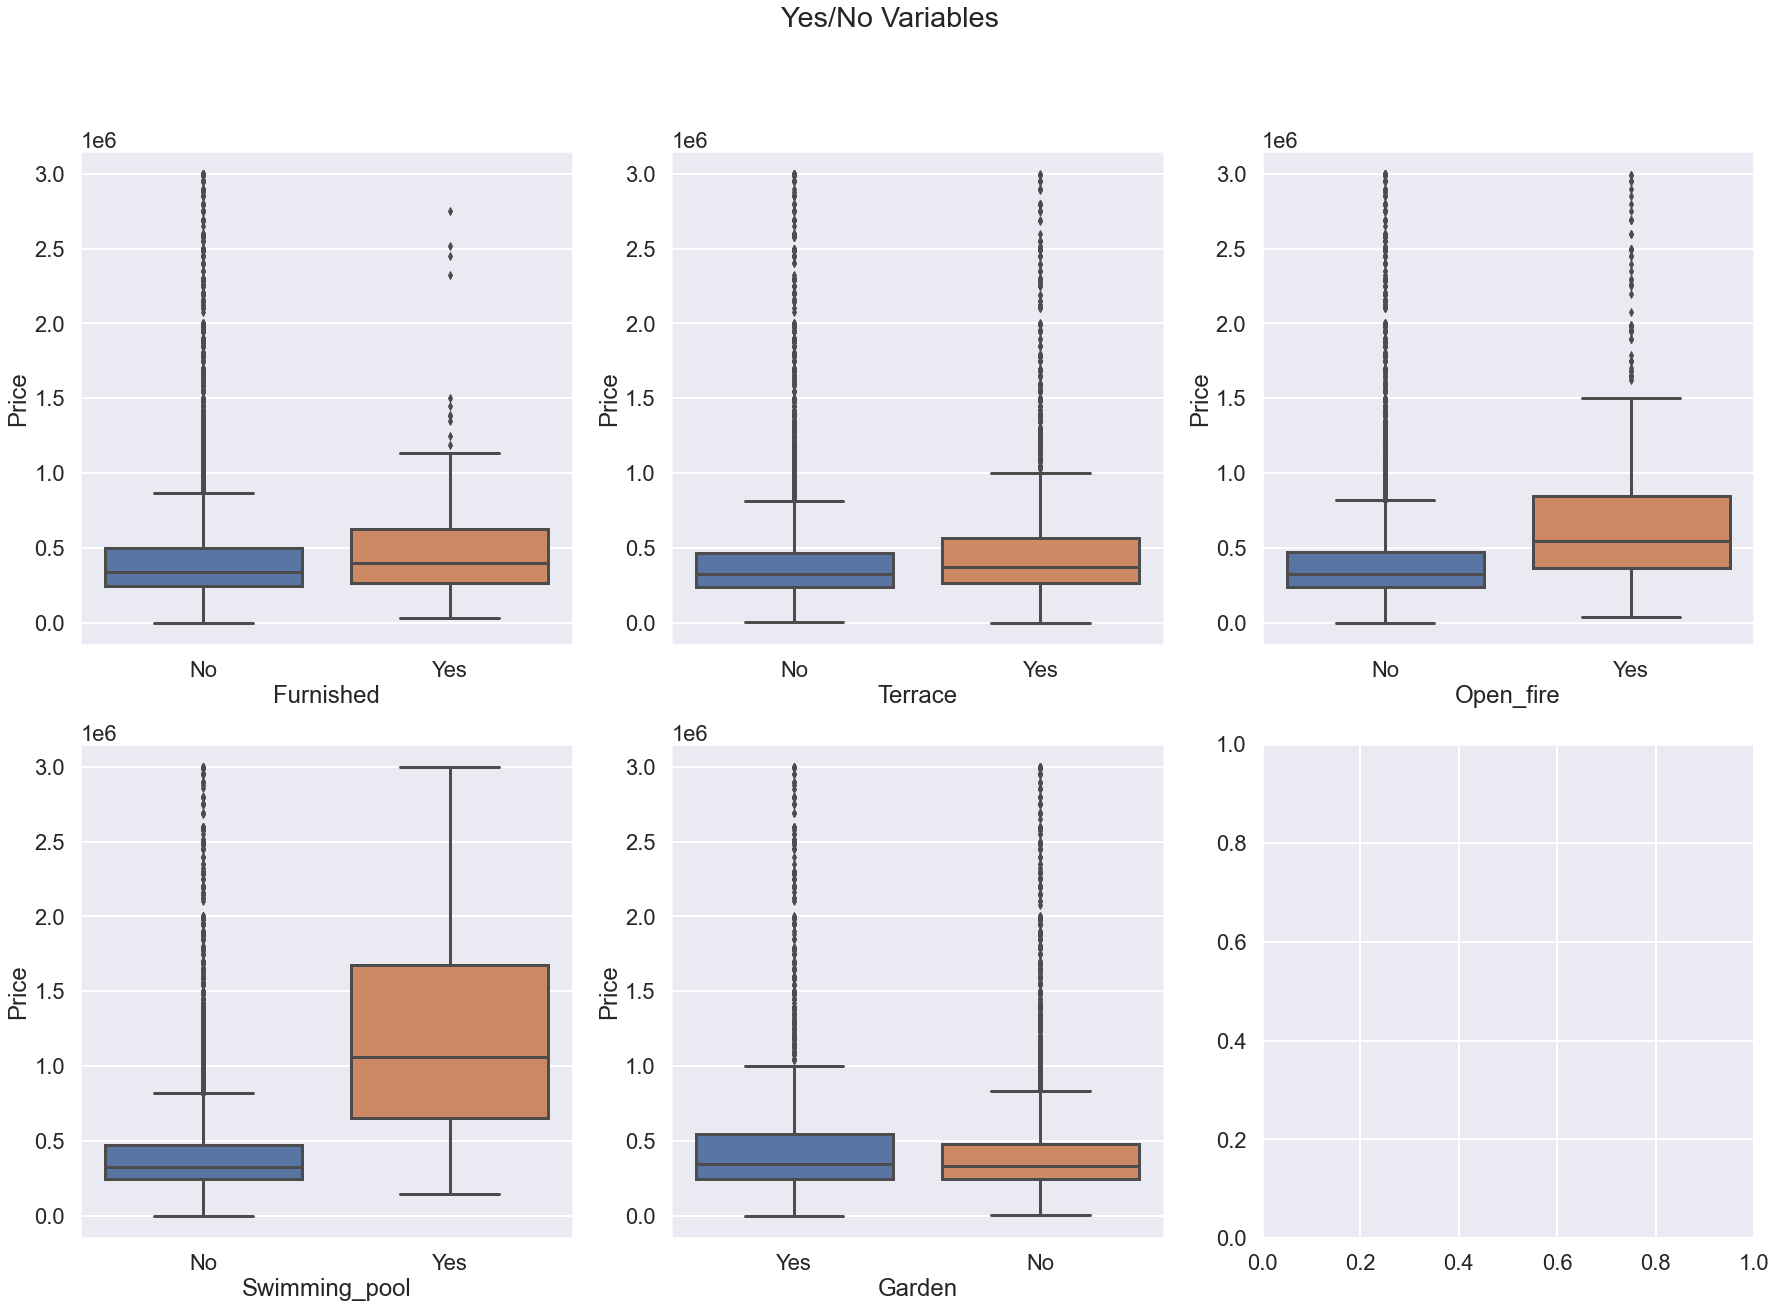

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
sns.set_context("poster")  
fig.suptitle('Yes/No Variables')
   
sns.boxplot(ax=axes[0, 0], data=df, x='Furnished', y='Price')
sns.boxplot(ax=axes[0, 1], data=df, x='Terrace', y='Price')
sns.boxplot(ax=axes[0, 2], data=df, x='Open_fire', y='Price')
sns.boxplot(ax=axes[1, 0], data=df, x='Swimming_pool', y='Price')
sns.boxplot(ax=axes[1, 1], data=df, x='Garden', y='Price')
#sns.boxplot(ax=axes[1, 2], data=df, x='Terrace', y='Price')

<AxesSubplot:xlabel='Garden', ylabel='Price'>

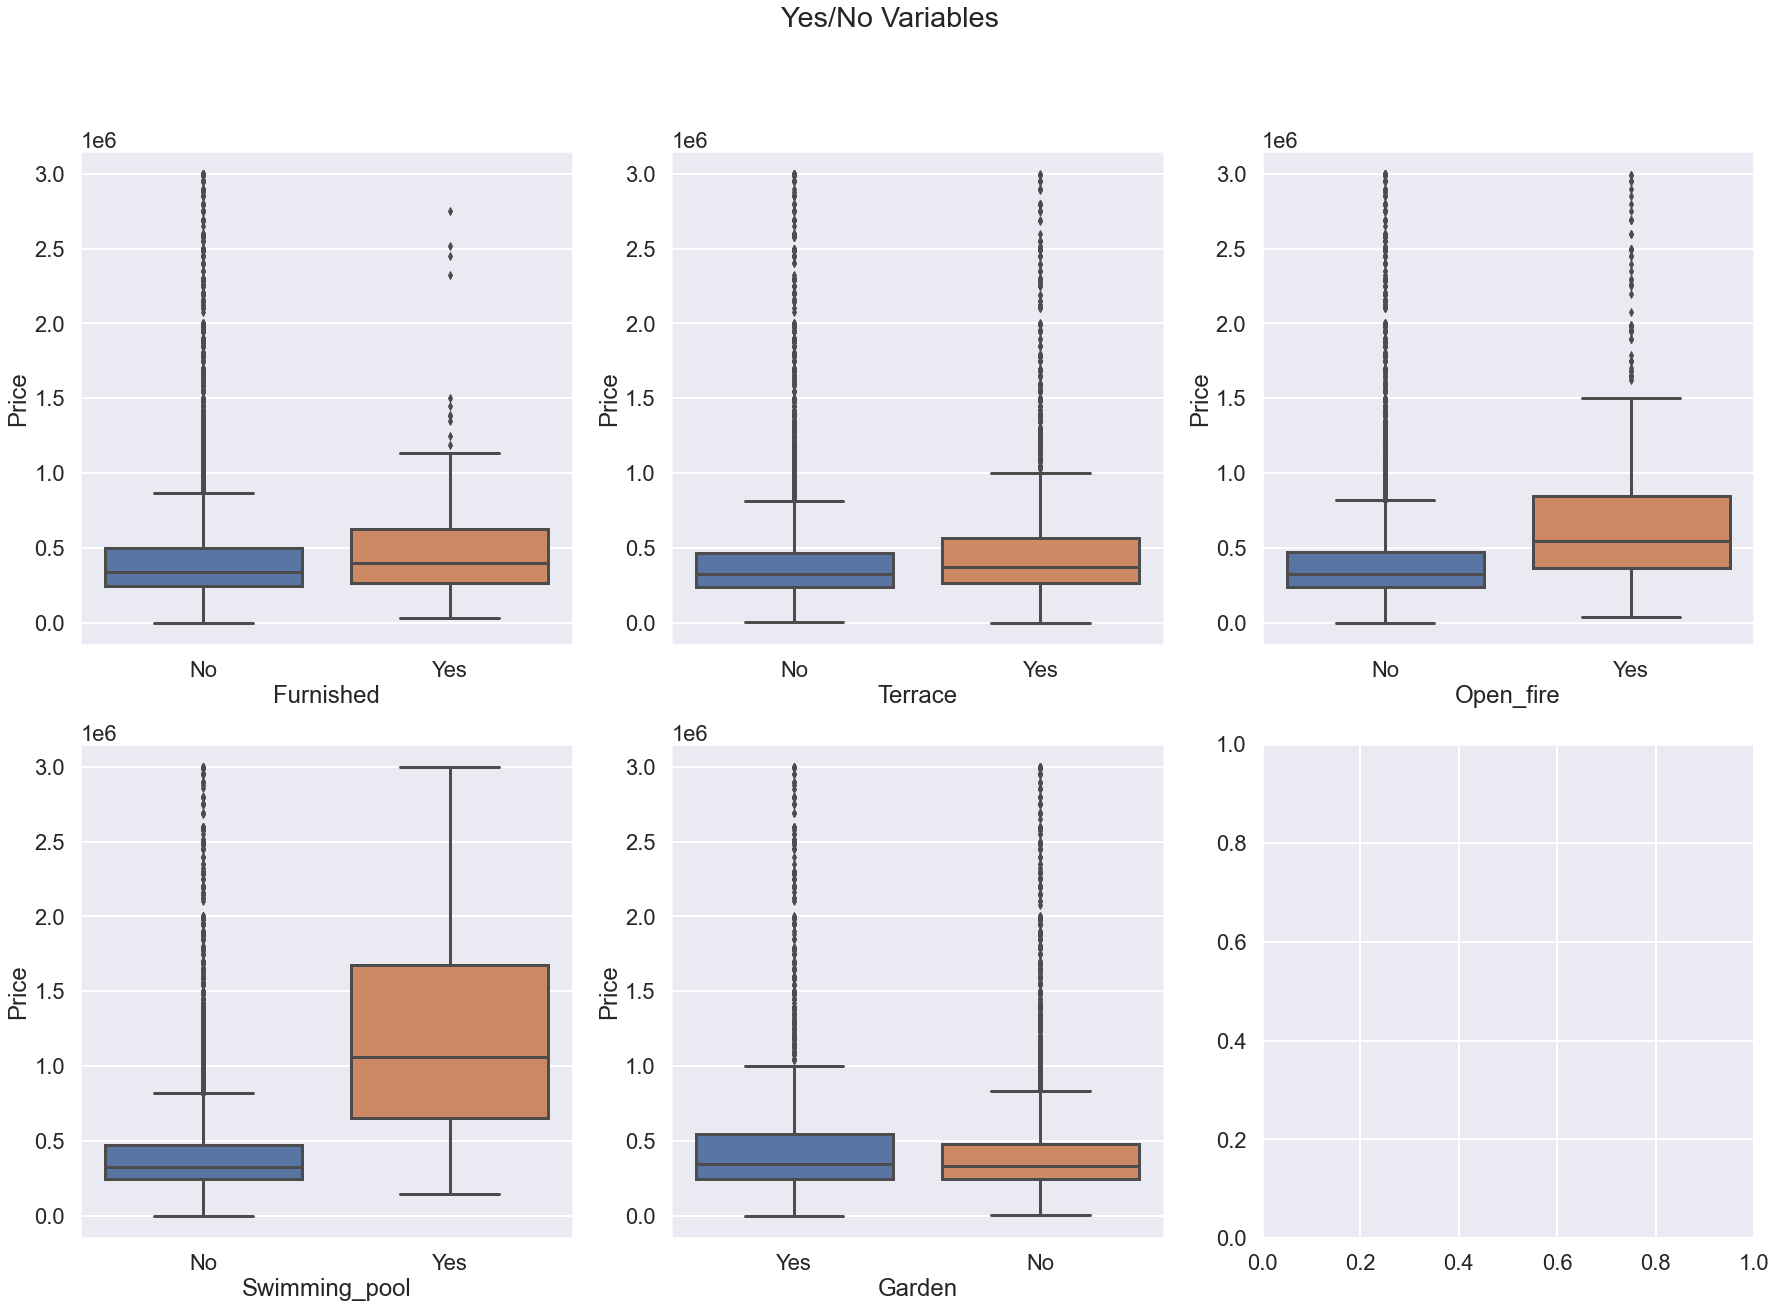

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
sns.set_context("poster")  
fig.suptitle('Yes/No Variables')
   
sns.boxplot(ax=axes[0, 0], data=df, x='Furnished', y='Price')
sns.boxplot(ax=axes[0, 1], data=df, x='Terrace', y='Price')
sns.boxplot(ax=axes[0, 2], data=df, x='Open_fire', y='Price')
sns.boxplot(ax=axes[1, 0], data=df, x='Swimming_pool', y='Price')
sns.boxplot(ax=axes[1, 1], data=df, x='Garden', y='Price')
#sns.boxplot(ax=axes[1, 2], data=df, x='Terrace', y='Price')

<AxesSubplot:xlabel='Garden', ylabel='Area'>

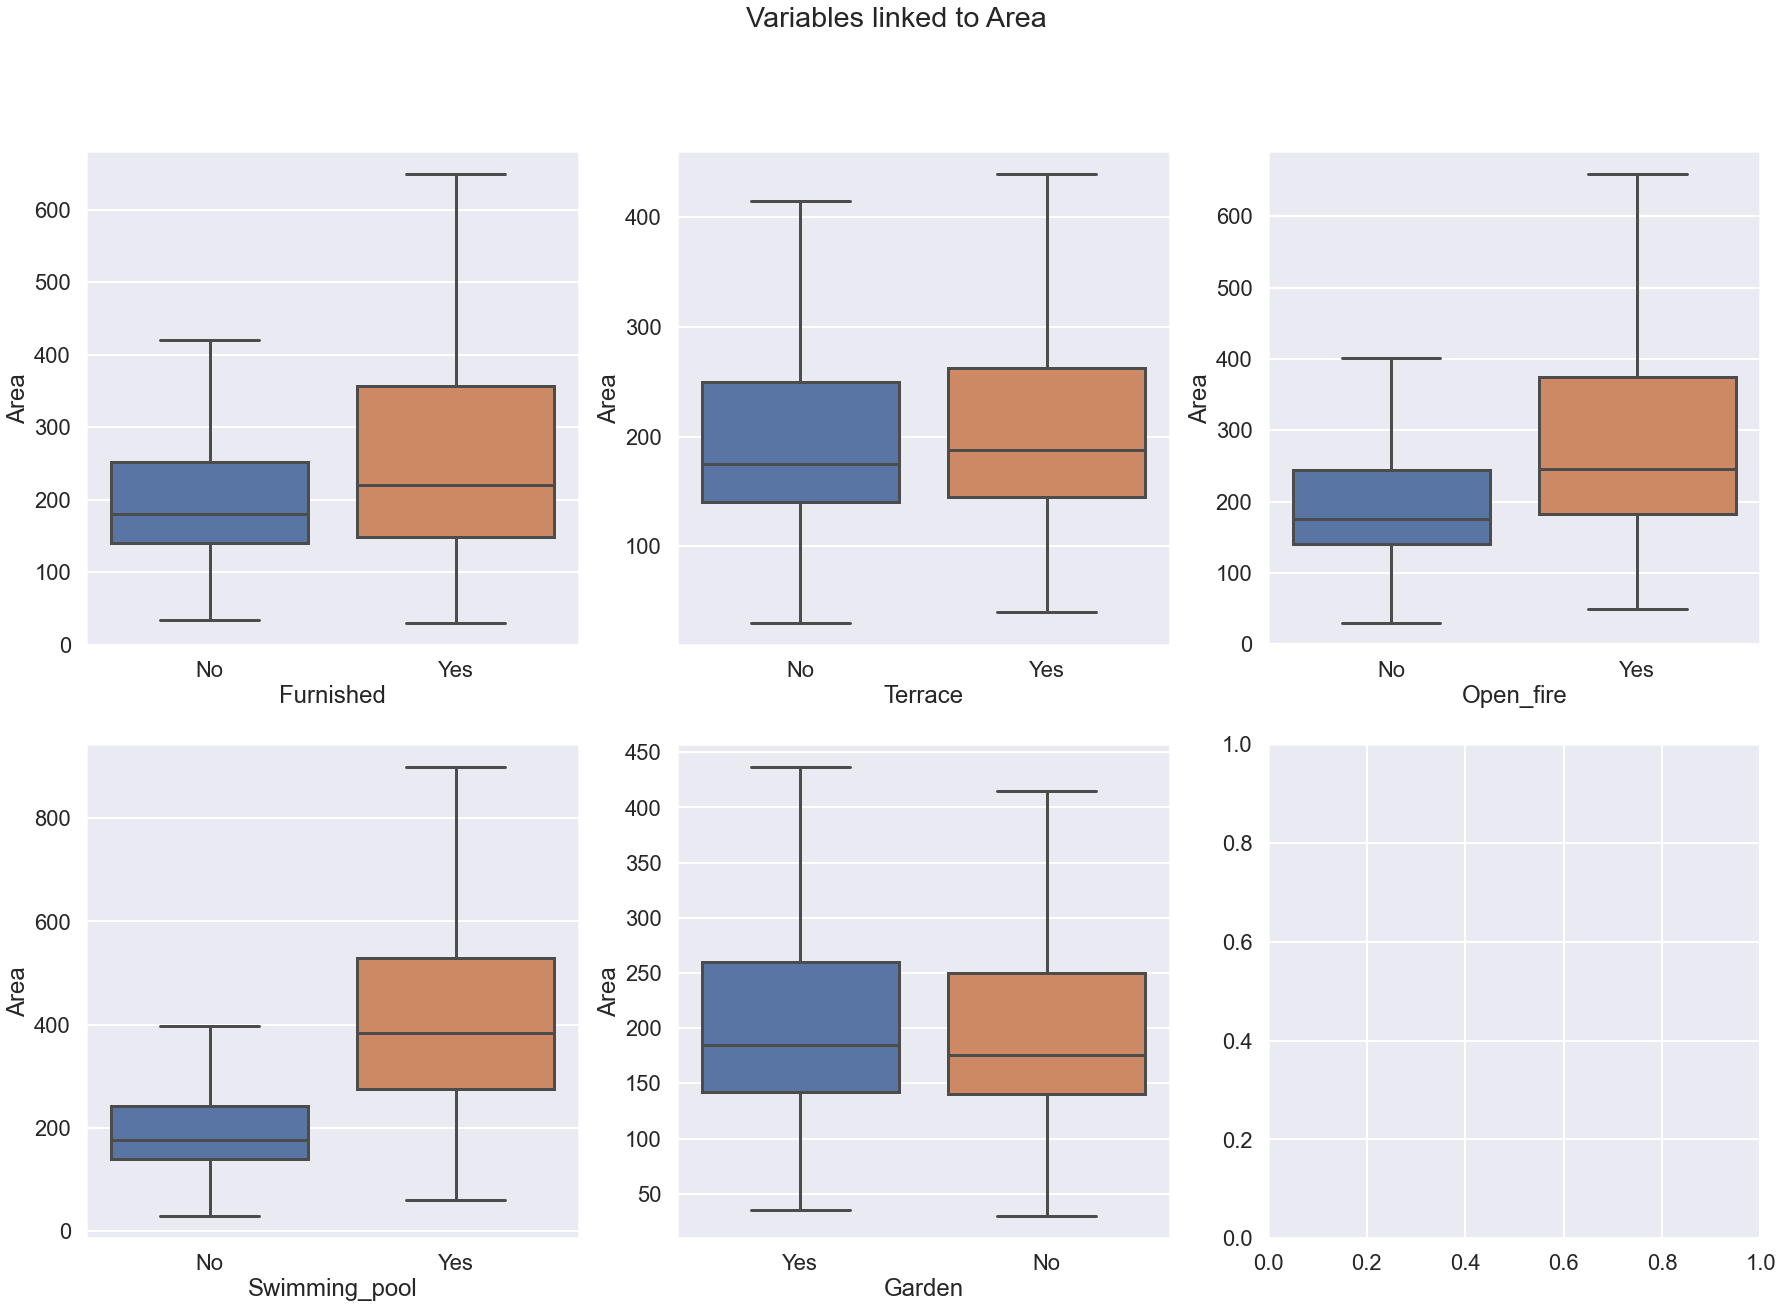

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
sns.set_context("poster")  
fig.suptitle('Variables linked to Area')
   
sns.boxplot(ax=axes[0, 0], data=df, x='Furnished', y='Area', showfliers = False)
sns.boxplot(ax=axes[0, 1], data=df, x='Terrace', y='Area', showfliers = False)
sns.boxplot(ax=axes[0, 2], data=df, x='Open_fire', y='Area', showfliers = False)
sns.boxplot(ax=axes[1, 0], data=df, x='Swimming_pool', y='Area', showfliers = False)
sns.boxplot(ax=axes[1, 1], data=df, x='Garden', y='Area', showfliers = False)
#sns.boxplot(ax=axes[1, 2], data=df, x='Terrace', y='Price')